 Health Insurance Cost Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url="https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv"
df=pd.read_csv(url)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Conver  the the string columns in to numerical values
df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df["sex"]

,sex
0,female
1,male
2,male
3,male
4,male
...,...
1333,male
1334,female
1335,female
1336,female


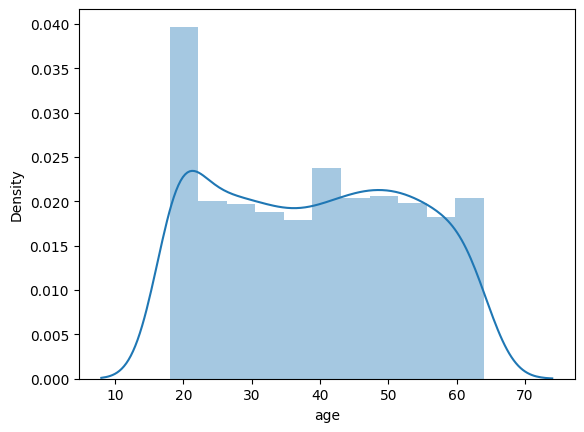

In [ ]:
#Distribution fo age
sns.distplot(df["age"])
plt.show()

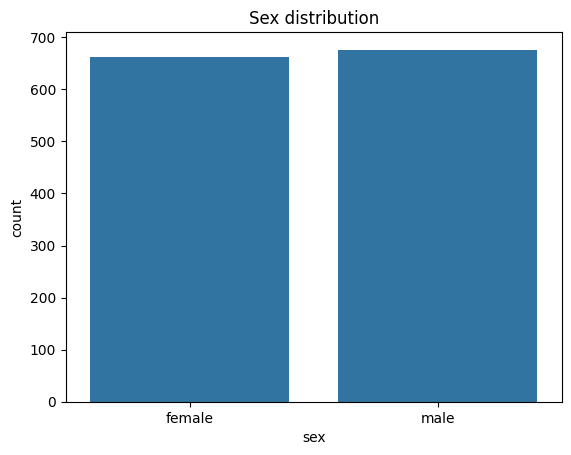

In [ ]:
#Count the Sex columns
sns.countplot(x="sex",data=df)
plt.title("Sex distribution")
plt.show()


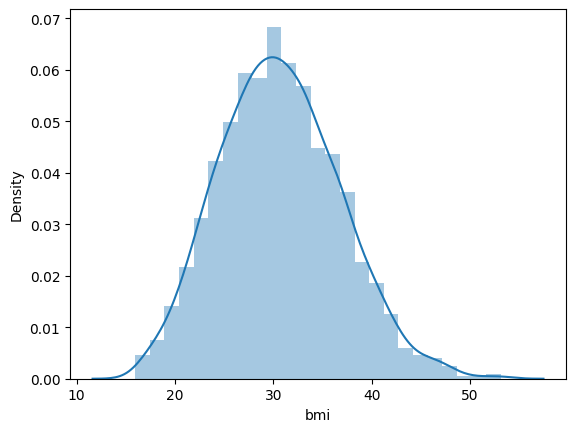

In [ ]:
#Distribution fo age
sns.distplot(df["bmi"])
plt.show()

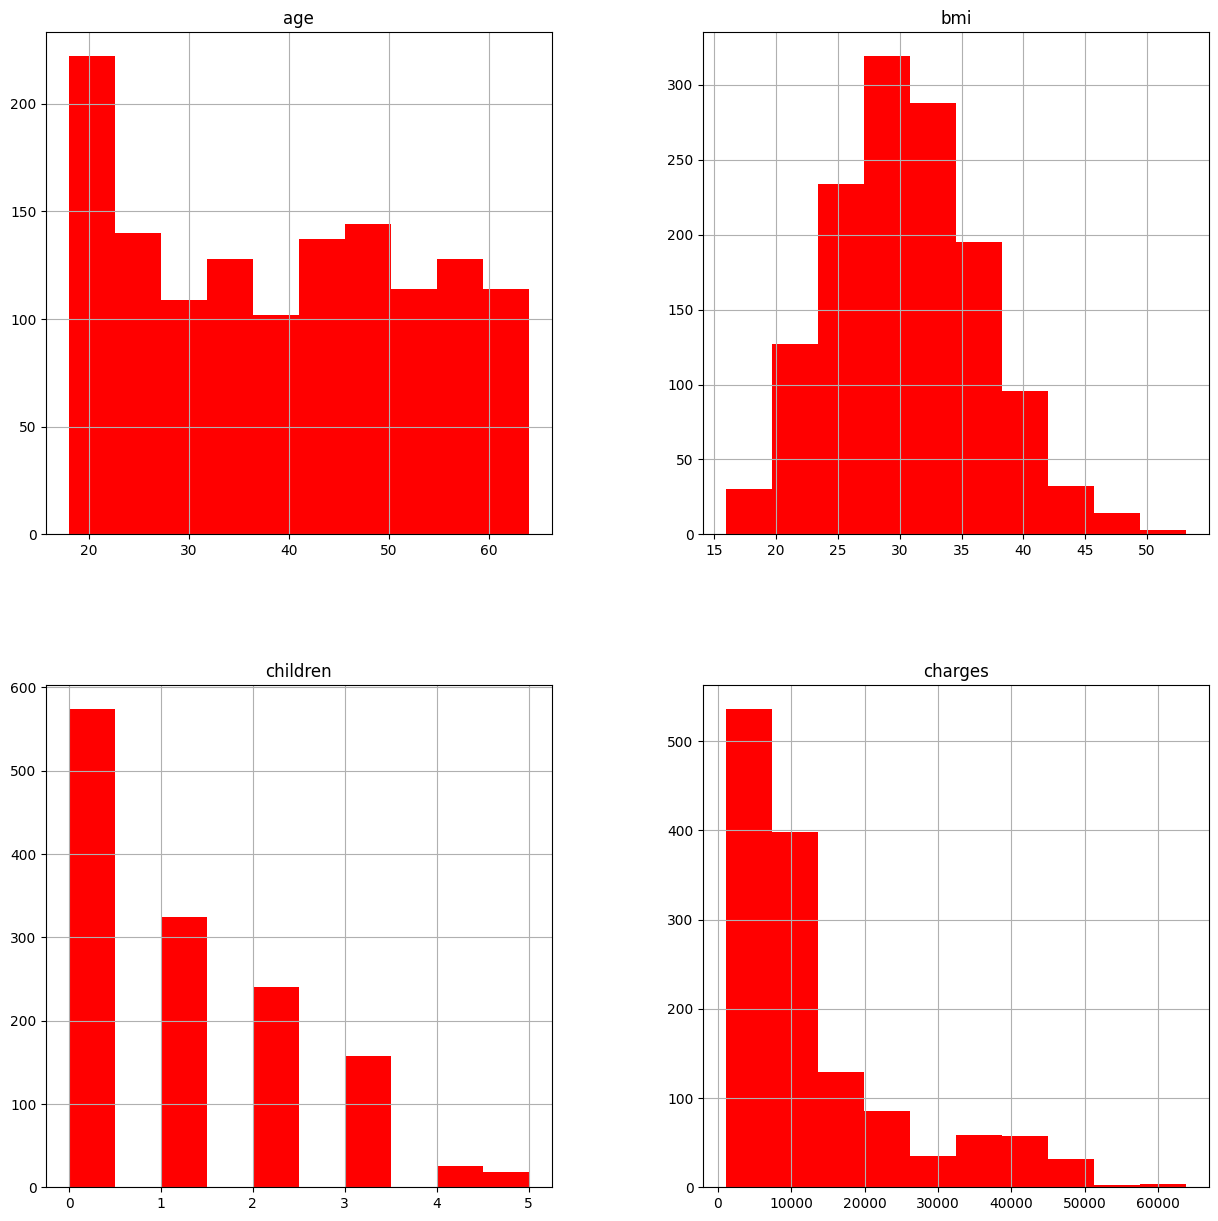

In [ ]:
#checking the all columns distribution plot
df.hist(figsize=(15,15),color="r")
plt.show()



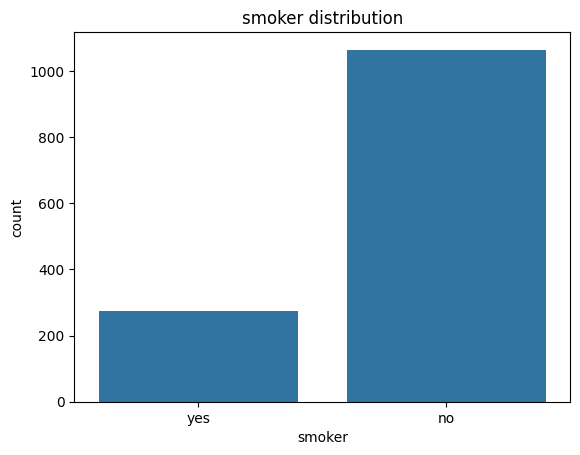

In [ ]:
sns.countplot(x="smoker",data=df)
plt.title("smoker distribution")
plt.show()


In [ ]:
df["smoker"].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df["sex"].value_counts()

,count
sex,
male,676
female,662


In [ ]:
df["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


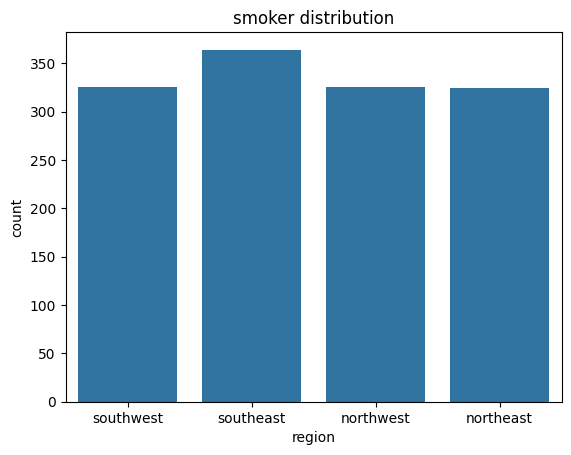

In [ ]:
sns.countplot(x="region",data=df)
plt.title("smoker distribution")
plt.show()

In [ ]:
df["region"].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Data Preprocessing

In [ ]:
#Label encoding of all categorical columns
df["sex"]=df["sex"].map({"male":1,"female":0})
df["smoker"]=df["smoker"].map({"yes":1,"no":0})
df["region"]=df["region"].map({"southwest":1,"southeast":2,"northwest":3,"northeast":4})



In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [ ]:
#Check the some analasys on this dataset
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


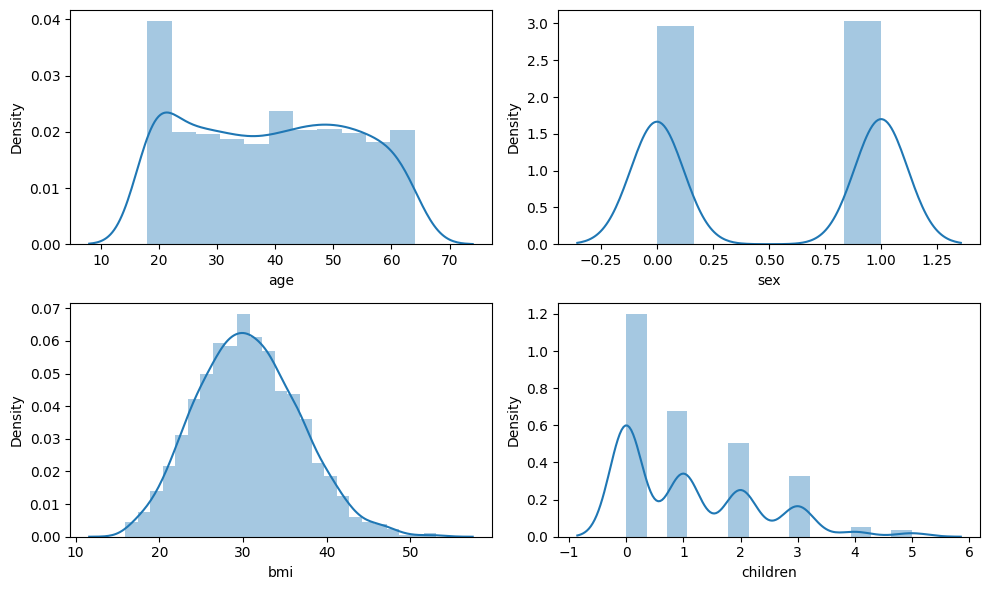

In [ ]:
#Distributon of the data
#Now check the distribution of the data in remaing column
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in df:
  if plotnumber<=4:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

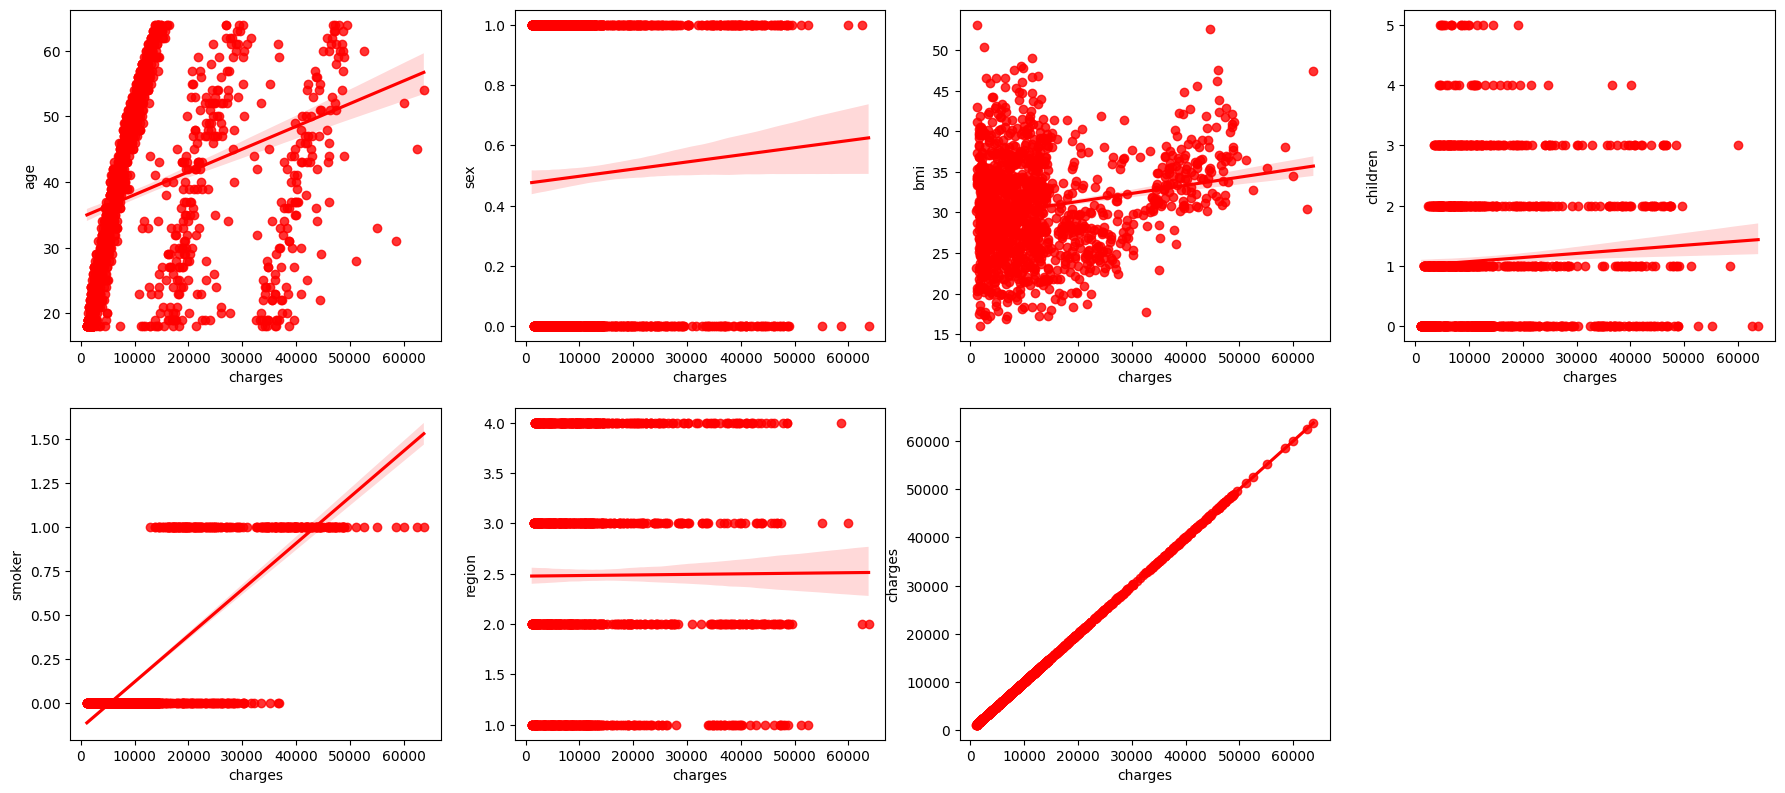

In [ ]:
plt.figure(figsize=(22,25))
p=1
for i in df:
  if p<=17:
    plt.subplot(5,4,p)
    sns.regplot(x="charges",y=i,data=df,color='r')
    plt.xlabel("charges")
    plt.ylabel(i)
  p=p+1
plt.show()


Overall Insights:
Strong Correlations:
Age, BMI, and especially Smoking have a noticeable impact on medical charges.
Weak Correlations:
Sex, Number of Children, and Region don’t show a strong relationship with charges.
These visualizations suggest that you should focus on variables like age, BMI, and smoking status in your models, as they have the most significant influence on the prediction of medical charges.

In [ ]:
#seperate the dependent variable and independent variable
X=df.drop(["charges"],axis=1)
y=df["charges"]

In [ ]:
X.shape

(1338, 6)

In [ ]:
y.shape

(1338,)

In [ ]:
#Modeling
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [ ]:
#Finding the best random state
maxAcc=0
maxRS=0
for i in range(1,200):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  pred=lr.predict(X_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRS=i
print("maximu r2 socre is ",maxAcc,"on rondom state",maxRS)


maximu r2 socre is  0.8041576323426198 on rondom state 112


In [ ]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=112)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)



GradientBoostingRegressor()

Prediction on test data

In [ ]:
y_pred_lr=lr.predict(X_test)
y_pred_svm=svm.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_dt=dt.predict(X_test)
y_pred_gb=gb.predict(X_test)
df1=pd.DataFrame({"Actual":y_test,"LR":y_pred_lr,"SVM":y_pred_svm,"RF":y_pred_rf,"DT":y_pred_dt,"GB":y_pred_gb})

In [ ]:
df1

,Actual,LR,SVM,RF,DT,GB
13,11090.71780,14905.551576,9648.401233,11417.968203,10594.22570,11694.541176
367,8017.06115,8437.877162,9572.486035,7922.132581,6858.47960,8721.431190
623,34617.84065,27764.520759,9473.972879,34553.888218,34439.85590,34358.227794
1281,24535.69855,34425.065285,9602.132061,23962.753420,23401.30575,24441.449124
966,23967.38305,34216.553947,9622.941361,23739.012388,23807.24060,24643.067288
...,...,...,...,...,...,...
536,5972.37800,10250.037628,9527.999867,6580.660395,4795.65680,6706.961295
919,5245.22690,8481.184404,9535.464211,5522.559300,5246.04700,6295.285247
155,6948.70080,11868.030676,9587.066836,8788.920627,7448.40395,9987.282265
821,2680.94930,545.099154,9498.117216,2774.727818,2302.30000,8166.492252


Finding the performance of them model

> Add blockquote



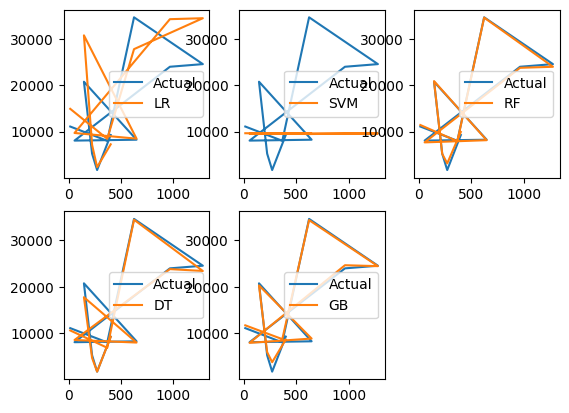

In [ ]:
plt.subplot(231)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["LR"].iloc[0:11],label="LR")
plt.legend()

plt.subplot(232)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["SVM"].iloc[0:11],label="SVM")
plt.legend()

plt.subplot(233)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["RF"].iloc[0:11],label="RF")
plt.legend()

plt.subplot(234)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["DT"].iloc[0:11],label="DT")
plt.legend()

plt.subplot(235)
plt.plot(df1["Actual"].iloc[0:11],label="Actual")
plt.plot(df1["GB"].iloc[0:11],label="GB")
plt.legend()


*Evaluate* out models

In [ ]:
print("R score",r2_score(y_test,y_pred_lr))
print("Mean squared error",mean_squared_error(y_test,y_pred_lr))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_lr))

R score 0.8041576323426198
Mean squared error 29880673.555641126
Mean absolte  error 3916.569265561581


In [ ]:
print("R score",r2_score(y_test,y_pred_svm))
print("Mean squared error",mean_squared_error(y_test,y_pred_svm))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_svm))

R score -0.07738939369947118
Mean squared error 164382820.48226067
Mean absolte  error 8519.762673778543


In [ ]:
print("R score",r2_score(y_test,y_pred_rf))
print("Mean squared error",mean_squared_error(y_test,y_pred_rf))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_rf))

R score 0.8952859772160049
Mean squared error 15976755.024635315
Mean absolte  error 2267.1388125210606


In [ ]:
print("R score",r2_score(y_test,y_pred_dt))
print("Mean squared error",mean_squared_error(y_test,y_pred_dt))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_dt))

R score 0.8172132365537417
Mean squared error 27888713.12251018
Mean absolte  error 2219.22566750995


In [ ]:
print("R score",r2_score(y_test,y_pred_gb))
print("Mean squared error",mean_squared_error(y_test,y_pred_gb))
print("Mean absolte  error",mean_absolute_error(y_test,y_pred_gb))

R score 0.9128553398388677
Mean squared error 13296107.341530867
Mean absolte  error 2179.672952329229


From the visualizations, Gradient Boosting (GB) and Random Forest (RF) seem to perform better than the other models. Gradient Boosting has a slight edge due to its smoother alignment with the actual values, indicating that it is likely the best-performing model in this comparison.

In [ ]:
#Now we have do cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,X,y,cv=5,scoring="r2")
print(score)
print(score.mean())
print("Difference between R2 socre and croos validation score is",(r2_score(y_test,y_pred_gb)-score.mean())*100)

[0.87517993 0.79144282 0.89407979 0.84918959 0.8597526 ]
0.8539289442154805
Difference between R2 socre and croos validation score is 5.8926395623387195


Cross-validation scores are good, meaning the model performs fairly consistently across the validation folds.
The gap between the training R² and cross-validation score suggests that while the model fits the training data well, it may not generalize as effectively to new data (possible overfitting).

Save the model

In [ ]:
#predecit the charges for new customers
sample_data={"age":20,"sex":1,"bmi":40.3,"children":3,"smoker":1,"region":2}
df1=pd.DataFrame(sample_data,index=[0])
df1




,age,sex,bmi,children,smoker,region
0,20,1,40.3,3,1,2


In [ ]:
new_predict=gb.predict(df1)
print(new_predict)

[39105.01160178]


In [ ]:
gb=GradientBoostingRegressor()
gb.fit(X,y)


GradientBoostingRegressor()

In [ ]:
import joblib
joblib.dump(gb,"model_joblib_gb")


['model_joblib_gb']

In [ ]:
model=joblib.load("model_joblib_gb")

In [ ]:
model.predict(df1)

array([39105.01160178])

In [ ]:
x

NameError: name 'x' is not defined

In [ ]:
y

In [ ]:
df["region"].unique()